In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# xarray to read NETCDF
import xarray as xr

# Load the dataset (NMME)
file_path = '/content/drive/My Drive/prec.CanESM5.1991.mon_Apr.nc'
ds = xr.open_dataset(file_path)

# View dataset info
print(ds)

<xarray.Dataset> Size: 63MB
Dimensions:  (Y: 181, L: 12, X: 360, M: 20, S: 1)
Coordinates:
  * Y        (Y) float32 724B -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * L        (L) float32 48B 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * X        (X) float32 1kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * M        (M) float32 80B 1.0 2.0 3.0 4.0 5.0 ... 16.0 17.0 18.0 19.0 20.0
  * S        (S) datetime64[ns] 8B 1991-04-01
Data variables:
    prec     (S, L, M, Y, X) float32 63MB ...


In [95]:
import pandas as pd

# Select a specific slice of data (e.g., April 1, 1991, and level 0.5)
precip_slice = ds['prec']

# Convert to a pandas DataFrame (flatten the 2D array to 1D)
precip_df = precip_slice.to_dataframe().reset_index()

# View the first few rows of the DataFrame
print(precip_df)
print(precip_df.columns)

                  S     L     M     Y      X      prec
0        1991-04-01   0.5   1.0 -90.0    0.0  0.514423
1        1991-04-01   0.5   1.0 -90.0    1.0  0.514423
2        1991-04-01   0.5   1.0 -90.0    2.0  0.514423
3        1991-04-01   0.5   1.0 -90.0    3.0  0.514423
4        1991-04-01   0.5   1.0 -90.0    4.0  0.514423
...             ...   ...   ...   ...    ...       ...
15638395 1991-04-01  11.5  20.0  90.0  355.0  0.437545
15638396 1991-04-01  11.5  20.0  90.0  356.0  0.437545
15638397 1991-04-01  11.5  20.0  90.0  357.0  0.437545
15638398 1991-04-01  11.5  20.0  90.0  358.0  0.437545
15638399 1991-04-01  11.5  20.0  90.0  359.0  0.437545

[15638400 rows x 6 columns]
Index(['S', 'L', 'M', 'Y', 'X', 'prec'], dtype='object')


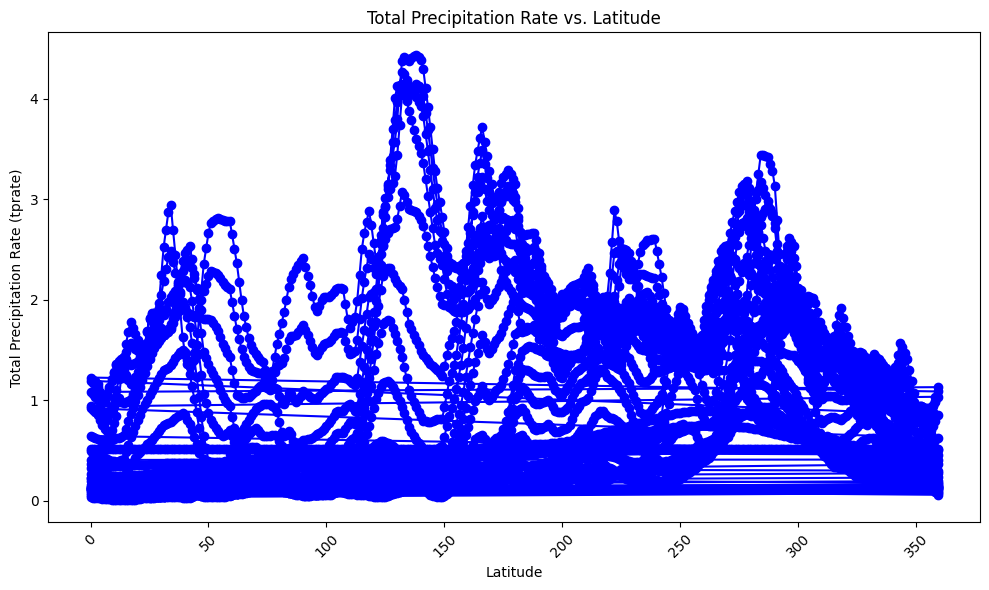

In [97]:
import matplotlib.pyplot as plt

# Subset the first 10000 points
test = precip_df[0:10000]

# Plot precipitation against forecast_reference_time
plt.figure(figsize=(10, 6))
plt.plot(test['X'], test['prec'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Total Precipitation Rate (prec)')
plt.title('Total Precipitation Rate vs. Latitude')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [100]:
# CDS dataset
file_path = '/content/drive/My Drive/prec.ECMWF.2024.mon_Dec.nc'

## Load the dataset (CDS)
ds_cds = xr.open_dataset(file_path)

# View dataset info
print(ds_cds)

<xarray.Dataset> Size: 79MB
Dimensions:                  (number: 51, forecast_reference_time: 1,
                              forecastMonth: 6, latitude: 180, longitude: 360)
Coordinates:
  * number                   (number) int64 408B 0 1 2 3 4 5 ... 46 47 48 49 50
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 8B 2024...
  * forecastMonth            (forecastMonth) int64 48B 1 2 3 4 5 6
  * latitude                 (latitude) float64 1kB 89.5 88.5 ... -88.5 -89.5
  * longitude                (longitude) float64 3kB 0.5 1.5 2.5 ... 358.5 359.5
Data variables:
    tprate                   (forecastMonth, forecast_reference_time, number, latitude, longitude) float32 79MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weath

In [99]:
# Convert to pandas dataframe
ds_cds_df = ds_cds.to_dataframe().reset_index()

# View dataframe
print(ds_cds_df)

          number forecast_reference_time  forecastMonth  latitude  longitude  \
0              0              2024-12-01              1      89.5        0.5   
1              0              2024-12-01              1      89.5        1.5   
2              0              2024-12-01              1      89.5        2.5   
3              0              2024-12-01              1      89.5        3.5   
4              0              2024-12-01              1      89.5        4.5   
...          ...                     ...            ...       ...        ...   
19828795      50              2024-12-01              6     -89.5      355.5   
19828796      50              2024-12-01              6     -89.5      356.5   
19828797      50              2024-12-01              6     -89.5      357.5   
19828798      50              2024-12-01              6     -89.5      358.5   
19828799      50              2024-12-01              6     -89.5      359.5   

                tprate  
0         6.65

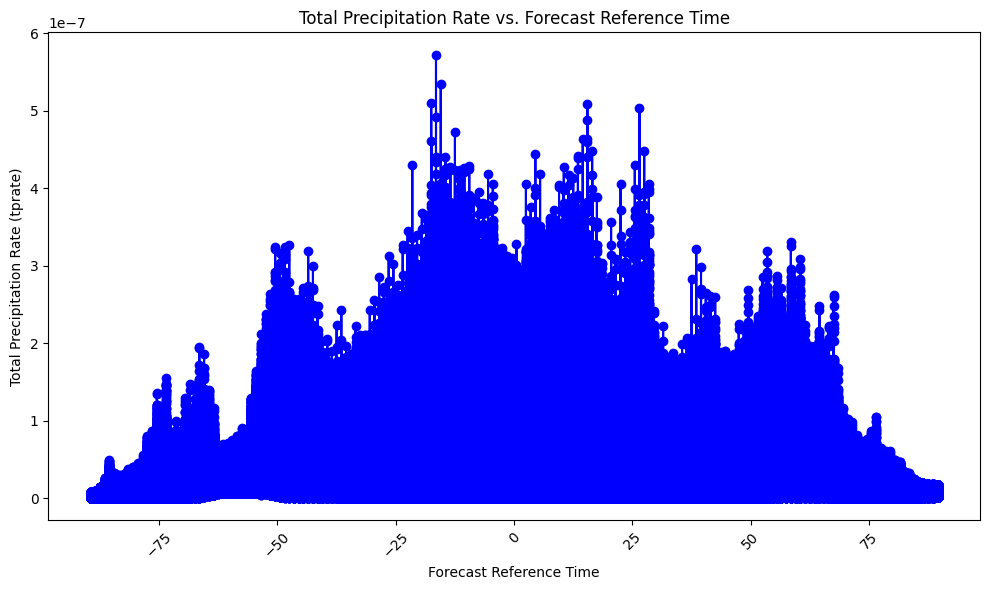

In [89]:
# Plot tprate against forecast_reference_time
plt.figure(figsize=(10, 6))
plt.plot(ds_cds_df['latitude'], ds_cds_df['tprate'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Total Precipitation Rate (tprate)')
plt.title('Total Precipitation Rate vs. Latitude')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()